## 14/11 Decision Trees

In [1]:
#install libraries
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install pyarrow
!pip install sklearn
!pip install xgboost
!pip install fastparquet

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pyarrow as pa
import sklearn as sk
from sklearn.model_selection import KFold, cross_val_score
from sklearn import ensemble
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv('/Users/yishaochizai/Desktop/capstone/cor_vars') 

In [5]:
#inspect the dataset
df.head()

,Unnamed: 0,d1_spend,d3_spend,d7_spend,d14_spend,d30_spend,avg_p_1,count_p_1,p_4,p_5,...,ms_12,ms_15,ms_16,ms_11,ms_5,ms_20,ms_26,ms_4,ms_25,ms_10
0,1,3.779171,3.779171,3.849837,3.849837,3.849837,40.583161,72,0.5,0.5,...,0,0,0,0,0,0,0,0,0,0
1,2,0.222576,0.536247,0.536247,0.536247,0.536247,64.728265,40,0.5,0.5,...,0,0,0,0,0,0,0,0,0,0
2,3,0.049088,0.049088,0.049088,0.049088,0.049088,91.734774,3,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,0.000000,0.000000,0.000000,0.000000,0.761715,0.000000,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,5,0.377731,0.377731,0.377731,0.377731,0.377731,62.417732,18,0.5,0.5,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Delete variable that cannot be in the model
dfx = df.drop(columns = ['Unnamed: 0'])

In [7]:
#double check
dfx.head()

,d1_spend,d3_spend,d7_spend,d14_spend,d30_spend,avg_p_1,count_p_1,p_4,p_5,avg_p_6,...,ms_12,ms_15,ms_16,ms_11,ms_5,ms_20,ms_26,ms_4,ms_25,ms_10
0,3.779171,3.779171,3.849837,3.849837,3.849837,40.583161,72,0.5,0.5,10.0,...,0,0,0,0,0,0,0,0,0,0
1,0.222576,0.536247,0.536247,0.536247,0.536247,64.728265,40,0.5,0.5,10.0,...,0,0,0,0,0,0,0,0,0,0
2,0.049088,0.049088,0.049088,0.049088,0.049088,91.734774,3,0.0,0.0,10.0,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.000000,0.000000,0.000000,0.761715,0.000000,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.377731,0.377731,0.377731,0.377731,0.377731,62.417732,18,0.5,0.5,10.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#descriptive statistics
dfx.describe()

,d1_spend,d3_spend,d7_spend,d14_spend,d30_spend,avg_p_1,count_p_1,p_4,p_5,avg_p_6,...,ms_12,ms_15,ms_16,ms_11,ms_5,ms_20,ms_26,ms_4,ms_25,ms_10
count,292289.000000,292289.000000,292289.000000,292289.000000,292289.000000,292289.000000,292289.000000,292289.000000,292289.000000,292289.000000,...,292289.000000,292289.000000,292289.000000,292289.000000,292289.000000,292289.000000,292289.000000,292289.000000,292289.000000,292289.000000
mean,6.543372,15.923689,33.017982,58.000325,109.085933,45.860937,42.111807,0.360935,0.307539,8.439453,...,0.012683,0.011588,0.008228,0.008221,0.006114,0.006083,0.005382,0.004136,0.003921,0.003572
std,100.829279,279.182672,655.713602,1218.293711,2416.610713,28.013999,215.576888,0.280378,0.250019,2.492164,...,0.111901,0.107022,0.090335,0.090298,0.077952,0.077756,0.073162,0.064181,0.062493,0.059658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.012000,0.020000,0.026970,0.033755,0.040000,29.065388,1.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.077576,0.096099,0.099567,0.103071,0.108182,50.000000,4.000000,0.500000,0.333333,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313078,0.417003,0.494292,0.552013,0.611727,64.333333,12.000000,0.500000,0.500000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12190.426422,33917.771254,83448.123455,191061.871159,457674.703490,237.400360,8825.000000,1.000000,1.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#create the new columns: day30 - day14 named as dif
dfx['dif'] = dfx['d30_spend'] - dfx['d14_spend']

In [10]:
#creat a new colomns : make dif a 0,1 value
dfx['dif_dummy'] = np.where(dfx['dif'] != 0, 1, dfx['dif'])

In [11]:
#creat the dataset for model
dfy_1 = dfx.drop(columns = ['dif'])
dfy_2 = dfy_1.drop(columns = ['dif_dummy'])
dfy_3 = dfy_2.drop(columns = ['d30_spend'])

## CLASSIFICATION : Building Decision Tree Model 

### Splitting Data

In [58]:
# define X and y
X = dfy_3
y = dfx.dif_dummy

In [59]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [60]:
#shape of train and test data
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (233831, 108)
Training Labels Shape: (233831,)
Testing Features Shape: (58458, 108)
Testing Labels Shape: (58458,)


### Building Decision Tree Model

In [61]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluate the model

In [16]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9527010845393273


In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

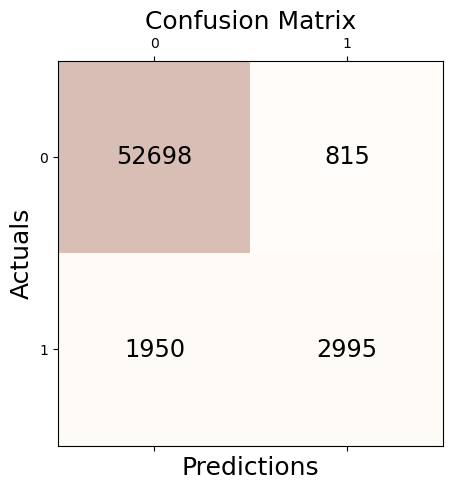

In [18]:
# Print the confusion matrix using Matplotlib

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [19]:

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [20]:
#precision
print('Precision: %.3f' % precision_score(y_test, y_pred))


Precision: 0.786


In [21]:
#Recall
print('Recall: %.3f' % recall_score(y_test, y_pred))


Recall: 0.606


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
# F1-score
F1 = 2 * (0.872 * 0.538) / (0.872 + 0.538)
print(F1)

0.665441134751773


### Visualizing Decision Trees

In [24]:
!pip install graphviz
!pip install pydotplus

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Using cached pydotplus-2.0.2-py3-none-any.whl


In [25]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [26]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

In [27]:
from sklearn.externals.six import StringIO
!pip install dtreeviz
from dtreeviz.trees import dtreeviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 1.2 MB/s eta 0:00:0000:01
  Using cached colour-0.1.5-py2.py3-none-any.whl (23 kB)


#### Print Text Representation

In [28]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_11 <= 0.01
|   |--- feature_34 <= 0.50
|   |   |--- feature_76 <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- feature_76 >  0.50
|   |   |   |--- class: 1.0
|   |--- feature_34 >  0.50
|   |   |--- feature_24 <= 29.50
|   |   |   |--- class: 1.0
|   |   |--- feature_24 >  29.50
|   |   |   |--- class: 0.0
|--- feature_11 >  0.01
|   |--- feature_16 <= 197.50
|   |   |--- feature_13 <= 48.50
|   |   |   |--- class: 0.0
|   |   |--- feature_13 >  48.50
|   |   |   |--- class: 0.0
|   |--- feature_16 >  197.50
|   |   |--- feature_24 <= 129.50
|   |   |   |--- class: 1.0
|   |   |--- feature_24 >  129.50
|   |   |   |--- class: 1.0



In [29]:
#save above result
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

[Text(0.5, 0.875, 'X[11] <= 0.01\ngini = 0.153\nsamples = 233831\nvalue = [214347, 19484]\nclass = y[0]'),
 Text(0.25, 0.625, 'X[34] <= 0.5\ngini = 0.003\nsamples = 4786\nvalue = [7, 4779]\nclass = y[1]'),
 Text(0.125, 0.375, 'X[76] <= 0.5\ngini = 0.003\nsamples = 4772\nvalue = [6, 4766]\nclass = y[1]'),
 Text(0.0625, 0.125, 'gini = 0.002\nsamples = 4733\nvalue = [5, 4728]\nclass = y[1]'),
 Text(0.1875, 0.125, 'gini = 0.05\nsamples = 39\nvalue = [1, 38]\nclass = y[1]'),
 Text(0.375, 0.375, 'X[24] <= 29.5\ngini = 0.133\nsamples = 14\nvalue = [1, 13]\nclass = y[1]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]\nclass = y[1]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = y[0]'),
 Text(0.75, 0.625, 'X[16] <= 197.5\ngini = 0.12\nsamples = 229045\nvalue = [214340, 14705]\nclass = y[0]'),
 Text(0.625, 0.375, 'X[13] <= 48.5\ngini = 0.07\nsamples = 219041\nvalue = [211132, 7909]\nclass = y[0]'),
 Text(0.5625, 0.125, 'gini = 0.047\nsamples = 204308\

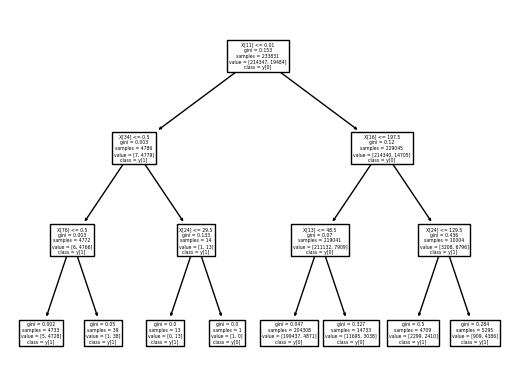

In [30]:
tree.plot_tree(clf, class_names=True)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
import matplotlib.pyplot as plt 

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [34]:
# predict probabilities
pred_prob1 = clf.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)



# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [35]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

print(auc_score1)

0.8604591436037663


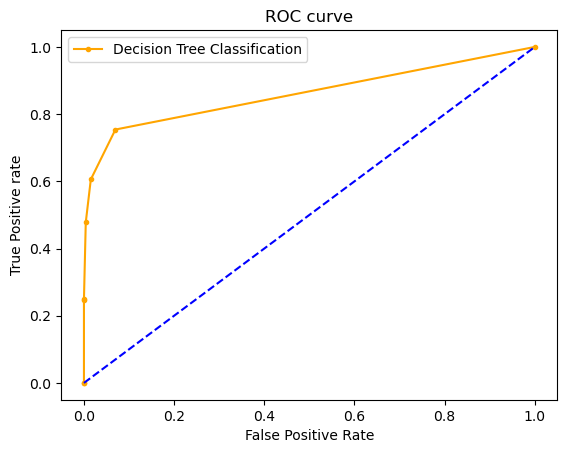

In [36]:
# plot roc curves
plt.plot(fpr1, tpr1, marker='.',color='orange', label='Decision Tree Classification')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')



plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Random Forest Classification

In [39]:
X = dfy_3
y = dfx.dif_dummy

In [40]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x2_train, x2_test, y2_train, y2_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [41]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc = RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(x2_train, y2_train)

rfc_predict = rfc.predict(x2_test)

In [42]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test, rfc_predict)


0.9578500803996032

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(y_test, rfc_predict)

array([[53011,   502],
       [ 1962,  2983]])

In [44]:
metrics.precision_score(y_test, rfc_predict)

0.8559540889526542

In [45]:
metrics.recall_score(y_test, rfc_predict)

0.6032355915065722

In [47]:
prediction_2 = x2_test
result_2 = pd.DataFrame(rfc_predict)
prediction_update_2 = np.append(prediction_2, result_2, 1)

df2_2 = pd.DataFrame(prediction_update_2)
df2_2.to_csv('1212_rf.csv')

In [48]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring = 'roc_auc')

In [50]:
#The roc_auc scoring used in the cross-validation model shows the area under the ROC curve.
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())


=== Confusion Matrix ===
[[53011   502]
 [ 1962  2983]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     53513
         1.0       0.86      0.60      0.71      4945

    accuracy                           0.96     58458
   macro avg       0.91      0.80      0.84     58458
weighted avg       0.96      0.96      0.95     58458



=== All AUC Scores ===
[0.92888209 0.93340048 0.92912242 0.9328254  0.93395563 0.93538179
 0.93056164 0.93196114 0.92815747 0.93133104]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9315579100043255


In [51]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, rfc_predict))

Accuracy: 0.9578500803996032


In [52]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_jobs=1)

In [53]:
#variable importance
importance = rfc.feature_importances_
indices = np.argsort(importance)[::-1]
feat_labels = dfx.columns[0:]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importance[indices[f]]))

 1) avg_p_6                        0.078301
 2) sum_p_9                        0.071453
 3) avg_p_8                        0.068484
 4) sum_p_8                        0.060060
 5) count_p_7                      0.054580
 6) avg_p_9                        0.047687
 7) len_p_14                       0.046716
 8) d14_spend                      0.046181
 9) d7_spend                       0.042405
10) avg_p_1                        0.038481
11) p_5                            0.035872
12) d3_spend                       0.034864
13) count_p_11                     0.027857
14) d1_spend                       0.027447
15) count_p_12                     0.026112
16) count_p_8                      0.023857
17) d30_spend                      0.023616
18) avg_p_19                       0.021612
19) first_p_18                     0.020012
20) count_p_13                     0.019760
21) count_p_10                     0.019441
22) max_p_2_0.00999999977648258    0.016204
23) avg_p_13                    

In [54]:
import seaborn as sns

In [55]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df= fi_df.head(10)

#Define size of bar plot
    plt.figure(figsize=(10, 10))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


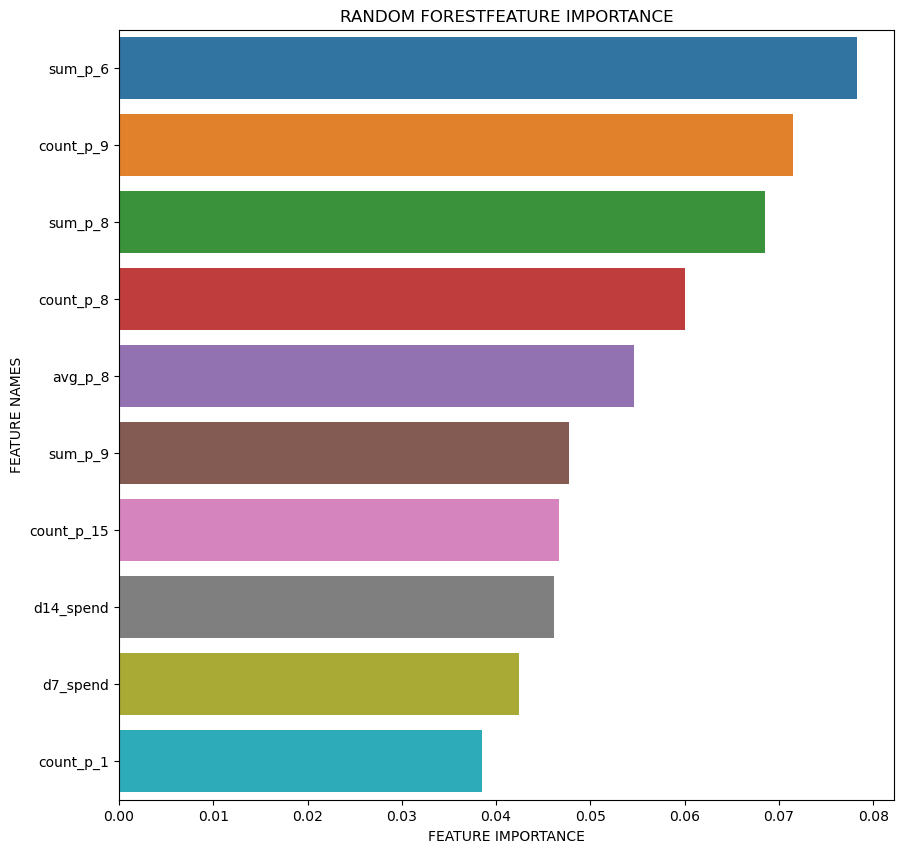

In [57]:
plot_feature_importance(importance, dfy_3.columns, 'RANDOM FOREST')